# Lesson1 手書き文字認識をしよう（ニューラルネットワーク入門）

## 目次

- 1.6の解答
- Section2 実装①
  - 2.1 MNISTによるMLPの復習

## 1.6の解答

1. 学習データ以外の未知のデータに対するモデルの予測性能を何というか  
  ①神通力　②バイアス　**③汎化性能**　④共起性
2. データセット全体を一度に全て使用して学習する方法を何というか  
  ①転移学習　②ワンショット学習　③過学習　**④バッチ学習**　
3. 名義尺度のデータをバイナリベクトルによって表現したものを何というか  
  ①分散表現　**②one-hot表現**　③ビット表現　④ユニタリ表現
4. モデルの学習に当たって最小化するものは何か  
  ①精度　**②損失関数**　③スコア　④F値

## Section2 実装①

### 2.1 MNISTによるMLPの復習

In [1]:
# データのロード
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=256, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(units=100))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [4]:
# 学習
model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
60/60 [==============================] - 29s 37ms/step - loss: 3894.4536 - accuracy: 0.1069 - val_loss: 2.3031 - val_accuracy: 0.1029
Epoch 2/10
60/60 [==============================] - 1s 13ms/step - loss: 2.3149 - accuracy: 0.1069 - val_loss: 2.3061 - val_accuracy: 0.1135
Epoch 3/10
60/60 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1125 - val_loss: 2.3029 - val_accuracy: 0.1135
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 2.3019 - accuracy: 0.1125 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 5/10
60/60 [==============================] - 0s 4ms/step - loss: 2.3017 - accuracy: 0.1125 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 2.3016 - accuracy: 0.1125 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 7/10
60/60 [==============================] - 0s 5ms/step - loss: 2.3015 - accuracy: 0.1125 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 8/10
60/

In [5]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.30230712890625
Test accuracy: 0.11349999904632568


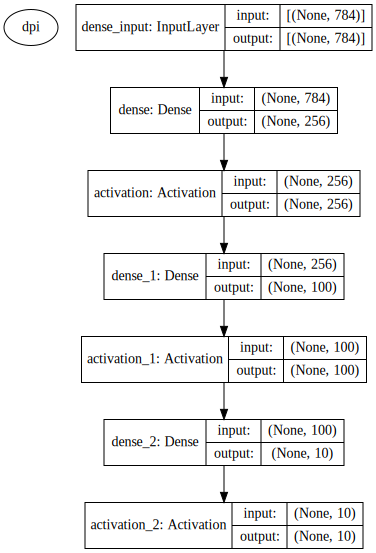

In [6]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True,dpi=None).create(prog='dot', format='svg'))